# ETL Project

## Import Dependencies and Setup

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

## Extract data

In [2]:
#Fastfood data from https://www.kaggle.com/datafiniti/fast-food-restaurants
fast_food_file = 'Resources/Fast_Food_Restaurants.csv'

In [3]:
#Fast food dataframe
fast_food_df = pd.read_csv(fast_food_file)
fast_food_df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...


In [4]:
#US state population data from wikipedia to dataframe
url = 'https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population'
pop_df = pd.read_html(url)[0]
pop_df

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1.0,NaN,California,39512223,37254523,6.1%,"+2,257,700",NaN,718404,745514,702885,11.96%
1,NaN,NaN,Texas,28995881,25145561,15.3%,"+3,850,320",NaN,763050,805441,698503,8.68%
2,NaN,NaN,Florida,21477737,18801310,14.2%,"+2,676,427",NaN,740611,795472,696468,6.44%
3,NaN,NaN,New York,19453561,19378102,0.4%,"+75,459",NaN,670812,720502,717707,5.91%
4,NaN,NaN,Pennsylvania,12801989,12702379,0.8%,"+99,610",NaN,640099,711222,705715,3.87%
5,NaN,NaN,Illinois,12671821,12830632,-1.2%,"−158,811",NaN,633591,703990,712864,3.85%
6,NaN,NaN,Ohio,11689100,11536504,1.3%,"+152,596",NaN,649394,730569,721032,3.53%
7,NaN,NaN,Georgia,10617423,9687653,9.6%,"+929,770",NaN,663589,758387,691975,3.18%
8,NaN,NaN,North Carolina,10488084,9535483,10.0%,"+952,601",NaN,699206,806776,733498,3.14%
9,NaN,NaN,Michigan,9986857,9883640,1.0%,"+103,217",NaN,624179,713347,705974,3.02%


In [5]:
#Get state abbreviations
abbr_url= 'https://simple.wikipedia.org/wiki/U.S._postal_abbreviations#States'
state_abbr = pd.read_html(abbr_url)[1]
state_abbr

,State Abbreviation,State Name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AZ,Arizona
4,CA,California
5,CO,Colorado
6,CT,Connecticut
7,DE,Delaware
8,FL,Florida
9,GA,Georgia


## Transforming data

In [6]:
#Creating a filtered dataframe from specific columns
fast_food_cols = ['id', 'categories', 'city', 'name', 'province']
fast_food_transformed = fast_food_df[fast_food_cols].copy()
fast_food_transformed

,id,categories,city,name,province
0,AWrSh_KgsVYjT2BJAzaH,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Greeley,Carl's Jr.,CO
1,AWEKlA-LIxWefVJwxG9B,"Restaurant,Mexican Restaurants,Fast Food Resta...",Grand Junction,Del Taco,CO
2,AWrSfAcYsVYjT2BJAzPt,"Sandwich Shops,Fast Food Restaurants,Restauran...",Grand Junction,Which Wich,CO
3,AWrSa3NAQTFama1Xpkbz,"Fast Food Restaurants,Mexican Restaurants,Rest...",Aurora,Chipotle Mexican Grill,CO
4,AWrSaVGzZ4Yw-wtdgcaB,"Fast Food Restaurants,Mexican Restaurants,Rest...",Denver,Taco Bell,CO
...,...,...,...,...,...
9995,AVwd7U0T_7pvs4fz-fS_,"American Restaurants,Caterers,Soul Food Restau...",Bessemer,Church's Chicken Of Birmingham,AL
9996,AV1XW1fF3D1zeR_xFKHL,"Mexican Restaurants,Caterers,Delicatessens,Iri...",Raleigh,Luxury Box,NC
9997,AV5UVbkiRxPSIh2RiQxV,"Carry-out food,Hot dog restaurants,Fast Food R...",Plover,McDonald's,WI
9998,AVwc9BxYByjofQCxj_GW,"Carry-out food,Caterers,Restaurant delivery se...",Hendersonville,Pizza Hut,TN


In [7]:
#Rename columns
fast_food_transformed = fast_food_transformed.rename(columns={'id': 'ID', 'categories':'Categories', 
                                                              'city':'City',
                                                              'name':'Restaurant_Name', 'province': 'State'})
fast_food_transformed

,ID,Categories,City,Restaurant_Name,State
0,AWrSh_KgsVYjT2BJAzaH,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Greeley,Carl's Jr.,CO
1,AWEKlA-LIxWefVJwxG9B,"Restaurant,Mexican Restaurants,Fast Food Resta...",Grand Junction,Del Taco,CO
2,AWrSfAcYsVYjT2BJAzPt,"Sandwich Shops,Fast Food Restaurants,Restauran...",Grand Junction,Which Wich,CO
3,AWrSa3NAQTFama1Xpkbz,"Fast Food Restaurants,Mexican Restaurants,Rest...",Aurora,Chipotle Mexican Grill,CO
4,AWrSaVGzZ4Yw-wtdgcaB,"Fast Food Restaurants,Mexican Restaurants,Rest...",Denver,Taco Bell,CO
...,...,...,...,...,...
9995,AVwd7U0T_7pvs4fz-fS_,"American Restaurants,Caterers,Soul Food Restau...",Bessemer,Church's Chicken Of Birmingham,AL
9996,AV1XW1fF3D1zeR_xFKHL,"Mexican Restaurants,Caterers,Delicatessens,Iri...",Raleigh,Luxury Box,NC
9997,AV5UVbkiRxPSIh2RiQxV,"Carry-out food,Hot dog restaurants,Fast Food R...",Plover,McDonald's,WI
9998,AVwc9BxYByjofQCxj_GW,"Carry-out food,Caterers,Restaurant delivery se...",Hendersonville,Pizza Hut,TN


In [8]:
#Keeping specific columns
state_pop = ['State', 'Population estimate, July 1, 2019[2]', 'Percent change, 2010–2019[note 1]', 'Percent of the total U.S. population, 2018[note 3]']
populate_by_state = pop_df[state_pop].copy()
populate_by_state

,State,"Population estimate, July 1, 2019[2]","Percent change, 2010–2019[note 1]","Percent of the total U.S. population, 2018[note 3]"
0,California,39512223,6.1%,11.96%
1,Texas,28995881,15.3%,8.68%
2,Florida,21477737,14.2%,6.44%
3,New York,19453561,0.4%,5.91%
4,Pennsylvania,12801989,0.8%,3.87%
5,Illinois,12671821,-1.2%,3.85%
6,Ohio,11689100,1.3%,3.53%
7,Georgia,10617423,9.6%,3.18%
8,North Carolina,10488084,10.0%,3.14%
9,Michigan,9986857,1.0%,3.02%


In [9]:
#Dropping non-states
populate_by_state = populate_by_state.drop([31,49,52,53,54,55,56,57,58,59])
populate_by_state=populate_by_state.reset_index()


In [10]:
populate_by_state

,index,State,"Population estimate, July 1, 2019[2]","Percent change, 2010–2019[note 1]","Percent of the total U.S. population, 2018[note 3]"
0,0,California,39512223,6.1%,11.96%
1,1,Texas,28995881,15.3%,8.68%
2,2,Florida,21477737,14.2%,6.44%
3,3,New York,19453561,0.4%,5.91%
4,4,Pennsylvania,12801989,0.8%,3.87%
5,5,Illinois,12671821,-1.2%,3.85%
6,6,Ohio,11689100,1.3%,3.53%
7,7,Georgia,10617423,9.6%,3.18%
8,8,North Carolina,10488084,10.0%,3.14%
9,9,Michigan,9986857,1.0%,3.02%


In [11]:
#Merging population df and state abbreviations df
us_state_population=pd.merge(populate_by_state, state_abbr, left_on='State', right_on='State Name')
us_state_population

,index,State,"Population estimate, July 1, 2019[2]","Percent change, 2010–2019[note 1]","Percent of the total U.S. population, 2018[note 3]",State Abbreviation,State Name
0,0,California,39512223,6.1%,11.96%,CA,California
1,1,Texas,28995881,15.3%,8.68%,TX,Texas
2,2,Florida,21477737,14.2%,6.44%,FL,Florida
3,3,New York,19453561,0.4%,5.91%,NY,New York
4,4,Pennsylvania,12801989,0.8%,3.87%,PA,Pennsylvania
5,5,Illinois,12671821,-1.2%,3.85%,IL,Illinois
6,6,Ohio,11689100,1.3%,3.53%,OH,Ohio
7,7,Georgia,10617423,9.6%,3.18%,GA,Georgia
8,8,North Carolina,10488084,10.0%,3.14%,NC,North Carolina
9,9,Michigan,9986857,1.0%,3.02%,MI,Michigan


In [12]:
#Dropping columns, keeping columns of interest, and renaming columns
us_state_population=us_state_population.drop(["State", "Percent change, 2010–2019[note 1]"], axis=1)
us_state_population=us_state_population[["index","State Abbreviation", "State Name",'Population estimate, July 1, 2019[2]',
       'Percent of the total U.S. population, 2018[note 3]']]
us_state_population=us_state_population.rename (columns={'index': 'id', 'Population estimate, July 1, 2019[2]':"Population",
       'Percent of the total U.S. population, 2018[note 3]':"Percent of Total Population"})

In [13]:
us_state_population

,id,State Abbreviation,State Name,Population,Percent of Total Population
0,0,CA,California,39512223,11.96%
1,1,TX,Texas,28995881,8.68%
2,2,FL,Florida,21477737,6.44%
3,3,NY,New York,19453561,5.91%
4,4,PA,Pennsylvania,12801989,3.87%
5,5,IL,Illinois,12671821,3.85%
6,6,OH,Ohio,11689100,3.53%
7,7,GA,Georgia,10617423,3.18%
8,8,NC,North Carolina,10488084,3.14%
9,9,MI,Michigan,9986857,3.02%


# Loading Data Into Database

In [14]:
#Connect to local database - make sure to remove username/password before pushing to github
rds_connection_string = "<username>:<password>@localhost:5432/restaurant_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [15]:
engine.table_names()

[]

In [16]:
#Pushing us_state_population df to database
us_state_population.to_sql(name='state_population', con=engine, if_exists='append', index=False)

In [17]:
pd.read_sql_query('select * from state_population', con=engine).head()

,id,State Abbreviation,State Name,Population,Percent of Total Population
0,0,CA,California,39512223,11.96%
1,1,TX,Texas,28995881,8.68%
2,2,FL,Florida,21477737,6.44%
3,3,NY,New York,19453561,5.91%
4,4,PA,Pennsylvania,12801989,3.87%


In [18]:
#Exploring columns in fast_food_transformed df
fast_food_transformed.columns

Index(['ID', 'Categories', 'City', 'Restaurant_Name', 'State'], dtype='object')

In [19]:
#Pushing fast_food_transformed df to database
fast_food_transformed.to_sql(name="restaurant", con=engine, if_exists='append', index=False)

In [20]:
pd.read_sql_query('select * from restaurant', con=engine).head()

,ID,Categories,City,Restaurant_Name,State
0,AWrSh_KgsVYjT2BJAzaH,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Greeley,Carl's Jr.,CO
1,AWEKlA-LIxWefVJwxG9B,"Restaurant,Mexican Restaurants,Fast Food Resta...",Grand Junction,Del Taco,CO
2,AWrSfAcYsVYjT2BJAzPt,"Sandwich Shops,Fast Food Restaurants,Restauran...",Grand Junction,Which Wich,CO
3,AWrSa3NAQTFama1Xpkbz,"Fast Food Restaurants,Mexican Restaurants,Rest...",Aurora,Chipotle Mexican Grill,CO
4,AWrSaVGzZ4Yw-wtdgcaB,"Fast Food Restaurants,Mexican Restaurants,Rest...",Denver,Taco Bell,CO


# Data Exploration

In [21]:
#Top 15 states by restaurant count
top_15_rest_count = pd.read_sql_query('SELECT r."State", s."Population", COUNT(r."Restaurant_Name") restaurant_count FROM state_population s\
                  JOIN restaurant r ON s."State Abbreviation" = r."State"\
                  GROUP BY r."State", s."Population" ORDER BY restaurant_count DESC LIMIT 15;', con=engine)
top_15_rest_count

,State,Population,restaurant_count
0,OH,11689100,922
1,FL,21477737,739
2,CA,39512223,727
3,NC,10488084,663
4,AL,4903185,635
5,IN,6732219,519
6,TX,28995881,426
7,WA,7614893,404
8,VA,8535519,348
9,OR,4217737,334


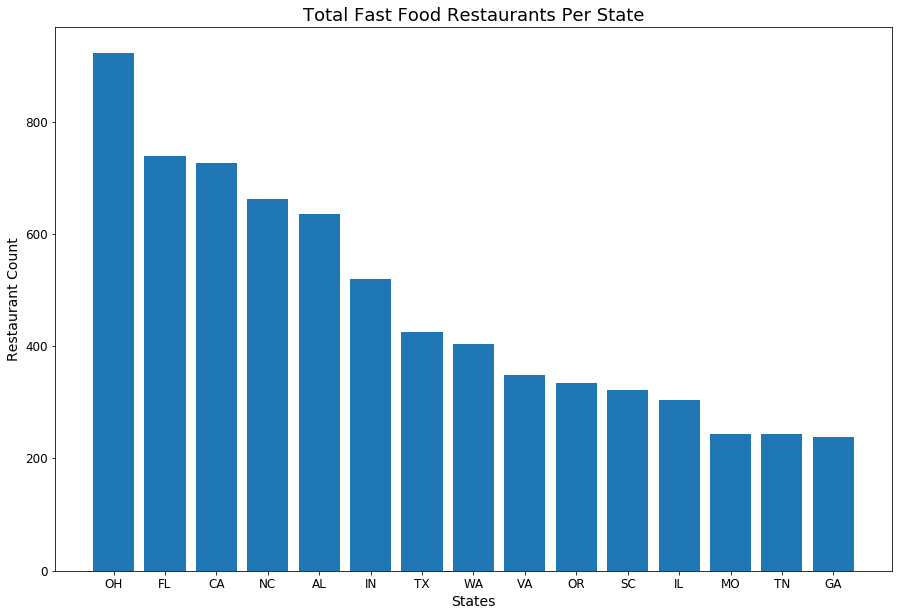

In [22]:
#Creating bar graph for total fast food restaurants per state
plt.figure(figsize=(15,10))
top_15_rest_count = plt.bar(top_15_rest_count['State'], top_15_rest_count['restaurant_count'])
plt.xlabel('States', size = 14)
plt.xticks(size = 12)
plt.ylabel('Restaurant Count', size = 14)
plt.yticks(size = 12)
plt.title('Total Fast Food Restaurants Per State', size=18)
plt.savefig('Images/Top15StatesByRestCount.png')
plt.show()

In [23]:
#Number of restaurants in the top 15 most populous states
rest_most_pop_state = pd.read_sql_query('SELECT r."State", s."Population", COUNT(r."Restaurant_Name") restaurant_count FROM state_population s\
                  JOIN restaurant r ON s."State Abbreviation" = r."State"\
                  GROUP BY r."State", s."Population" ORDER BY s."Population" DESC LIMIT 15;', con=engine)
rest_most_pop_state

,State,Population,restaurant_count
0,CA,39512223,727
1,TX,28995881,426
2,FL,21477737,739
3,NY,19453561,173
4,PA,12801989,194
5,IL,12671821,305
6,OH,11689100,922
7,GA,10617423,238
8,NC,10488084,663
9,MI,9986857,210


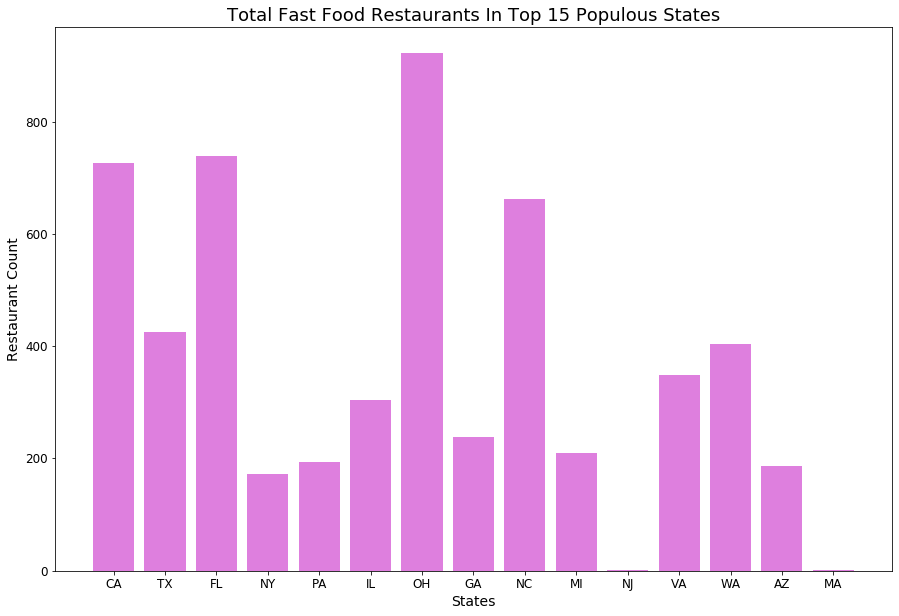

In [24]:
#Creating bar graph for number of restaurants in the top 15 most populous states
plt.figure(figsize=(15,10))
rest_most_pop_state_plt = plt.bar(rest_most_pop_state['State'], rest_most_pop_state['restaurant_count'], color = 'm', alpha = .5)
plt.xlabel('States', size = 14)
plt.xticks(size = 12)
plt.ylabel('Restaurant Count', size = 14)
plt.yticks(size = 12)
plt.title('Total Fast Food Restaurants In Top 15 Populous States', size=18)
plt.savefig('Images/Top15MostPopulousRestCount.png')
plt.show()

In [25]:
#Ohio restaurants
ohio_restaurant = pd.read_sql_query('SELECT s."State Name", r."Restaurant_Name", COUNT(r."Restaurant_Name") Restaurant_Name_Count FROM state_population s\
                                JOIN restaurant r ON s."State Abbreviation" = r."State"\
                                WHERE s."State Name" = \'Ohio\'\
                                GROUP BY r."Restaurant_Name", s."State Name"\
                                ORDER BY Restaurant_Name_Count DESC LIMIT 10;', con=engine)
ohio_restaurant

,State Name,Restaurant_Name,restaurant_name_count
0,Ohio,Pizza Hut,91
1,Ohio,SUBWAY,83
2,Ohio,Subway,60
3,Ohio,Dairy Queen,49
4,Ohio,McDonald's,41
5,Ohio,Chipotle Mexican Grill,39
6,Ohio,Panera Bread,34
7,Ohio,KFC,32
8,Ohio,Taco Bell,32
9,Ohio,Burger King,20


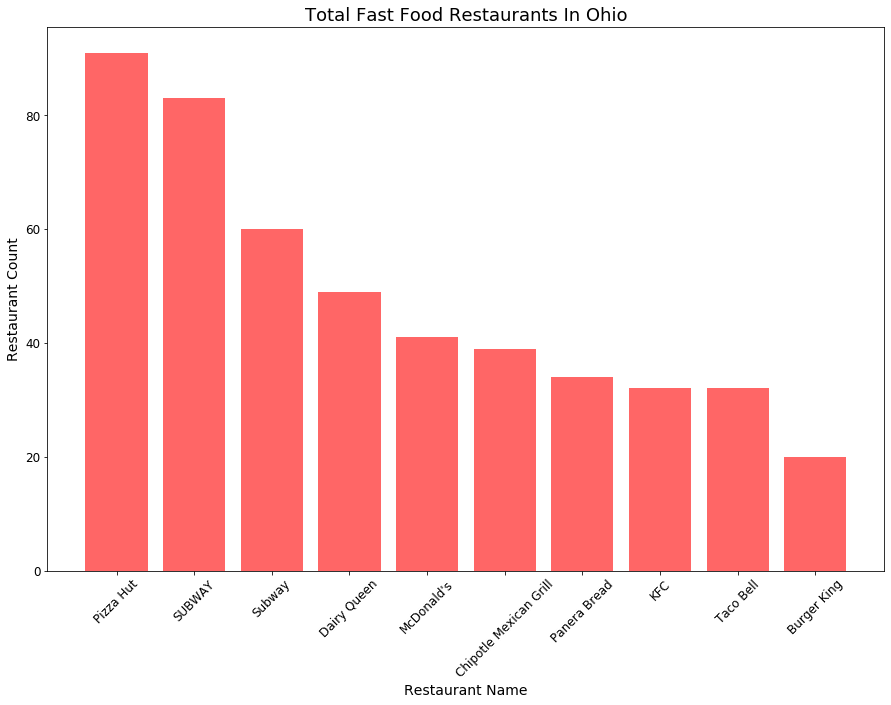

In [26]:
#Creating bar graph for number of restaurants Ohio
plt.figure(figsize=(15,10))
ohio_plt = plt.bar(ohio_restaurant['Restaurant_Name'], ohio_restaurant['restaurant_name_count'], color = 'r', alpha =.6)
plt.xlabel('Restaurant Name', size = 14)
plt.xticks(size = 12, rotation=45)
plt.ylabel('Restaurant Count', size = 14)
plt.yticks(size = 12)
plt.title('Total Fast Food Restaurants In Ohio', size=18)
plt.savefig('Images/OhioRestCount.png')
plt.show()

In [27]:
#California restaurants
california_rest = pd.read_sql_query('SELECT s."State Name", r."Restaurant_Name", COUNT(r."Restaurant_Name") Restaurant_Name_Count FROM state_population s\
                                JOIN restaurant r ON s."State Abbreviation" = r."State"\
                                WHERE s."State Name" = \'California\'\
                                GROUP BY r."Restaurant_Name", s."State Name"\
                                ORDER BY Restaurant_Name_Count DESC LIMIT 10;', con=engine)
california_rest

,State Name,Restaurant_Name,restaurant_name_count
0,California,McDonald's,60
1,California,Taco Bell,47
2,California,SUBWAY,44
3,California,Jack in the Box,42
4,California,KFC,37
5,California,Burger King,34
6,California,Subway,32
7,California,Panda Express,25
8,California,Del Taco,18
9,California,Round Table Pizza,17


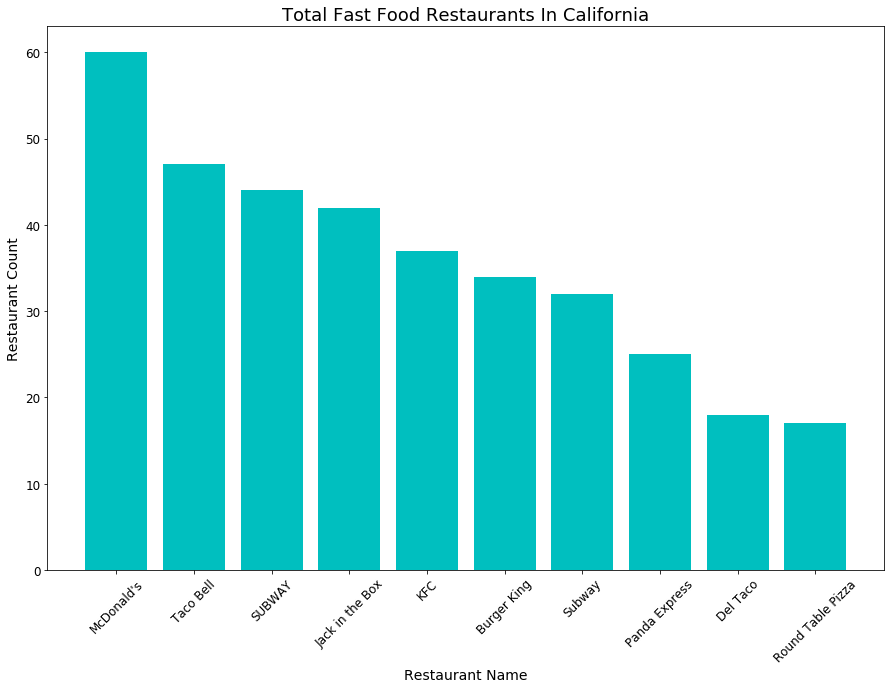

In [28]:
#Creating bar graph for number of restaurants in California
plt.figure(figsize=(15,10))
cali_plt = plt.bar(california_rest['Restaurant_Name'], california_rest['restaurant_name_count'], color = 'c')
plt.xlabel('Restaurant Name', size = 14)
plt.xticks(size = 12, rotation=45)
plt.ylabel('Restaurant Count', size = 14)
plt.yticks(size = 12)
plt.title('Total Fast Food Restaurants In California', size=18)
plt.savefig('Images/CaliRestCount.png')
plt.show()